In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [38]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [36]:
data=pd.read_csv("hiring.csv")
data.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [13]:
data.experience=data.experience.fillna("zero")


In [14]:
mean_=data["test_score(out of 10)"].mean()


In [15]:
data["test_score(out of 10)"]=data["test_score(out of 10)"].fillna(mean_)


In [16]:
#pip install word2number

In [17]:
from word2number import w2n


In [18]:
data.experience=data.experience.apply(w2n.word_to_num)


In [19]:
data


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [20]:
x=data.drop("salary($)",axis=1)
y=data["salary($)"]


In [21]:
model=LinearRegression()
model.fit(x,y)


LinearRegression()

In [22]:
model.coef_


array([2827.63404314, 1912.93803053, 2196.9753141 ])

In [23]:
model.intercept_

17237.3303137272

In [24]:
y_pred=model.predict(x)
model.score(x,y)

0.9639958361860579

In [25]:
model.score(x,y_pred)


1.0

In [26]:
import seaborn as sns

In [27]:
correlation = data.corr()
correlation


,experience,test_score(out of 10),interview_score(out of 10),salary($)
experience,1.000000,-0.241897,-0.29048,0.908017
test_score(out of 10),-0.241897,1.000000,0.13971,-0.002850
interview_score(out of 10),-0.290480,0.139710,1.00000,0.037820
salary($),0.908017,-0.002850,0.03782,1.000000


<AxesSubplot:>

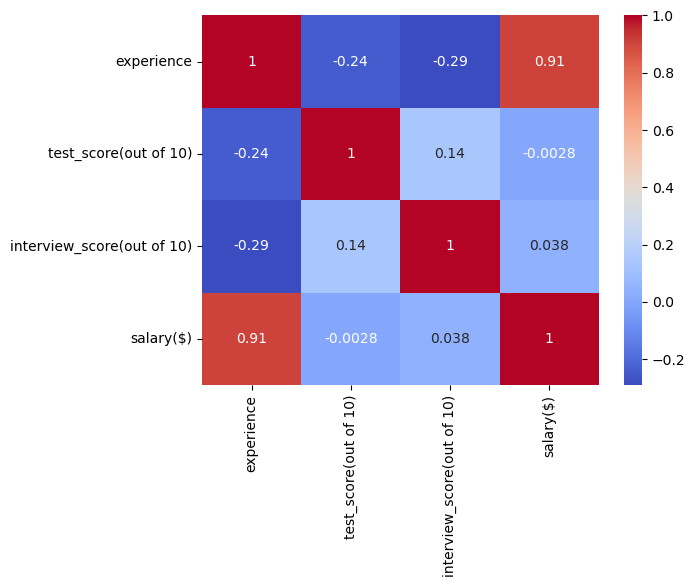

In [39]:
sns.heatmap(correlation,annot=True,cmap="coolwarm")

In [29]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


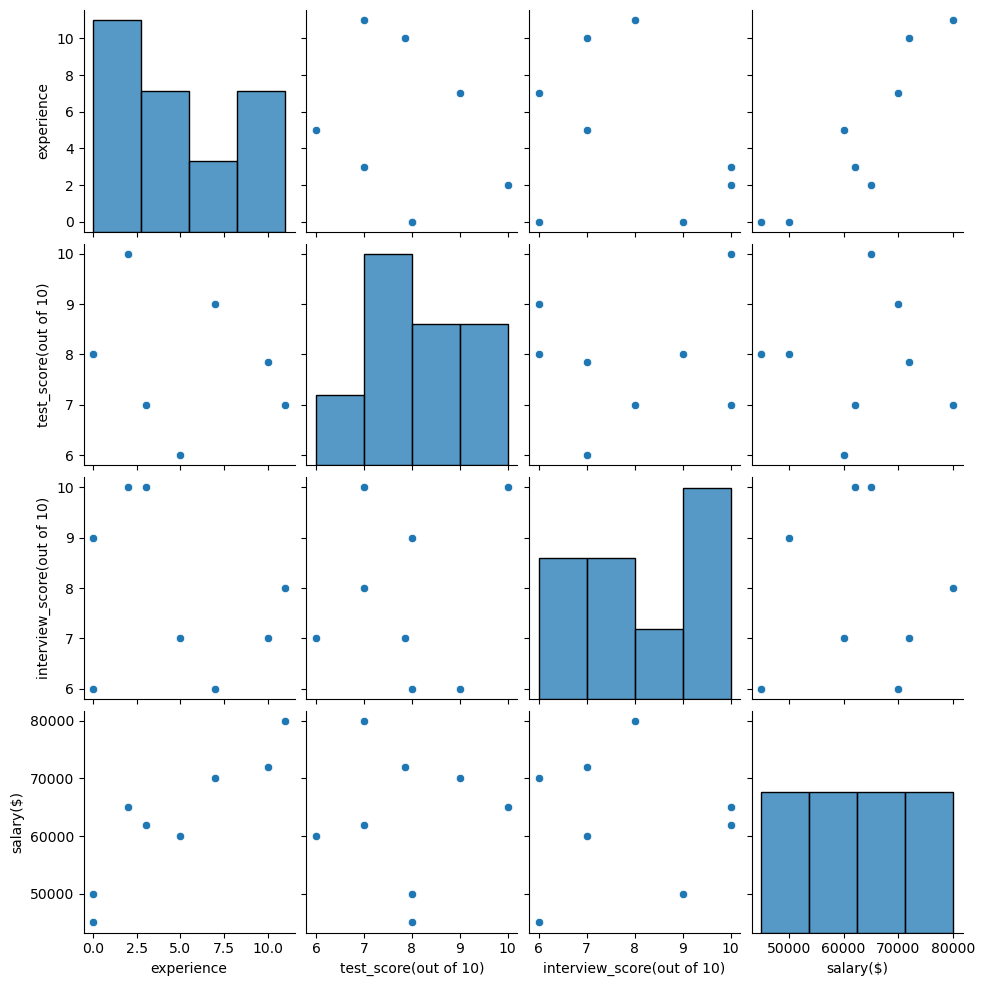

In [30]:
sns.pairplot(data)

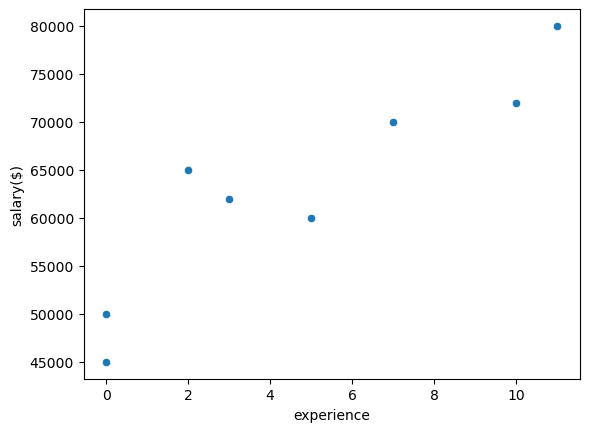

In [34]:
# Scatterplot for 'experience' vs 'salary'
sns.scatterplot(x='experience', y='salary($)', data=data)
plt.show()